In [242]:


import numpy as np
import pandas as pd



In [243]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

# Importing Power Generation & Weather Sensor Data

In [244]:
generation_data = pd.read_csv('/content/sample_data/Plant_1_Generation_Data.csv')
weather_data = pd.read_csv('/content/sample_data/Plant_1_Weather_Sensor_Data.csv')

In [245]:
generation_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68778 entries, 0 to 68777
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATE_TIME    68778 non-null  object 
 1   PLANT_ID     68778 non-null  int64  
 2   SOURCE_KEY   68778 non-null  object 
 3   DC_POWER     68778 non-null  float64
 4   AC_POWER     68778 non-null  float64
 5   DAILY_YIELD  68778 non-null  float64
 6   TOTAL_YIELD  68778 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 3.7+ MB


In [246]:
generation_data.sample(5).style.set_properties(
    **{
        'background-color': 'orange',
        'color': 'black',
        'border-color': 'darkblack'
    })

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
1613,15-05-2020 18:30,4135001,VHMLBKoKgIrUVDU,0.000000,0.000000,6258.000000,7212666.000000
49485,08-06-2020 20:15,4135001,1IF53ai7Xc0U56Y,0.000000,0.000000,8495.000000,6371833.000000
66875,17-06-2020 01:45,4135001,bvBOhCH3iADSZry,0.000000,0.000000,0.000000,6533549.000000
21860,26-05-2020 06:15,4135001,adLQvlD726eNBSB,443.571429,42.900000,8.142857,6355302.143000
15866,23-05-2020 09:15,4135001,pkci93gMrogZuBj,8779.428571,858.957143,1213.857143,7226413.857000


In [247]:
weather_data.sample(5).style.set_properties(
    **{
        'background-color': 'olive',
        'color': 'Black',
        'border-color': 'darkblack'
    })

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
1829,2020-06-03 21:45:00,4135001,HmiyD2TTLFNqkNe,23.153046,20.723840,0.000000
3018,2020-06-16 07:00:00,4135001,HmiyD2TTLFNqkNe,23.138751,24.801971,0.101726
201,2020-05-17 05:00:00,4135001,HmiyD2TTLFNqkNe,22.567999,20.847640,0.000000
171,2020-05-16 21:30:00,4135001,HmiyD2TTLFNqkNe,25.286442,22.648997,0.000000
202,2020-05-17 05:15:00,4135001,HmiyD2TTLFNqkNe,22.572514,20.913125,0.000000


# Adjust datetime format

In [248]:
generation_data['DATE'] = pd.to_datetime(generation_data['DATE_TIME']).dt.date
generation_data['TIME'] = pd.to_datetime(generation_data['DATE_TIME']).dt.time
weather_data['DATE'] = pd.to_datetime(weather_data['DATE_TIME']).dt.date
weather_data['TIME'] = pd.to_datetime(weather_data['DATE_TIME']).dt.time

In [249]:
generation_data.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,DATE,TIME
0,15-05-2020 00:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0,2020-05-15,00:00:00
1,15-05-2020 00:00,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0,2020-05-15,00:00:00
2,15-05-2020 00:00,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0,2020-05-15,00:00:00
3,15-05-2020 00:00,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0,2020-05-15,00:00:00
4,15-05-2020 00:00,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0,2020-05-15,00:00:00


In [250]:
weather_data.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,DATE,TIME
0,2020-05-15 00:00:00,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0,2020-05-15,00:00:00
1,2020-05-15 00:15:00,4135001,HmiyD2TTLFNqkNe,25.084589,22.761668,0.0,2020-05-15,00:15:00
2,2020-05-15 00:30:00,4135001,HmiyD2TTLFNqkNe,24.935753,22.592306,0.0,2020-05-15,00:30:00
3,2020-05-15 00:45:00,4135001,HmiyD2TTLFNqkNe,24.846130,22.360852,0.0,2020-05-15,00:45:00
4,2020-05-15 01:00:00,4135001,HmiyD2TTLFNqkNe,24.621525,22.165423,0.0,2020-05-15,01:00:00


In [251]:
del generation_data['DATE_TIME']
del weather_data['DATE_TIME']

In [252]:
generation_data['DATE_TIME'] = generation_data["DATE"].astype(str) + " " + generation_data["TIME"].astype(str)

In [253]:
weather_data['DATE_TIME'] = weather_data["DATE"].astype(str) + " " + weather_data["TIME"].astype(str)

In [254]:
generation_data['DATE_TIME']

,DATE_TIME
0,2020-05-15 00:00:00
1,2020-05-15 00:00:00
2,2020-05-15 00:00:00
3,2020-05-15 00:00:00
4,2020-05-15 00:00:00
...,...
68773,2020-06-17 23:45:00
68774,2020-06-17 23:45:00
68775,2020-06-17 23:45:00
68776,2020-06-17 23:45:00


In [255]:
gd1=generation_data
del gd1['DATE']
del gd1['TIME']
gd1

,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,DATE_TIME
0,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.000,6259559.0,2020-05-15 00:00:00
1,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.000,6183645.0,2020-05-15 00:00:00
2,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.000,6987759.0,2020-05-15 00:00:00
3,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.000,7602960.0,2020-05-15 00:00:00
4,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.000,7158964.0,2020-05-15 00:00:00
...,...,...,...,...,...,...,...
68773,4135001,uHbuxQJl8lW7ozc,0.0,0.0,5967.000,7287002.0,2020-06-17 23:45:00
68774,4135001,wCURE6d3bPkepu2,0.0,0.0,5147.625,7028601.0,2020-06-17 23:45:00
68775,4135001,z9Y9gH1T5YWrNuG,0.0,0.0,5819.000,7251204.0,2020-06-17 23:45:00
68776,4135001,zBIq5rxdHJRwDNY,0.0,0.0,5817.000,6583369.0,2020-06-17 23:45:00


In [256]:
gd1['DATE_TIME'] = pd.to_datetime(gd1['DATE_TIME'], format='%Y-%m-%d %H:%M:%S')


In [257]:
gd1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68778 entries, 0 to 68777
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   PLANT_ID     68778 non-null  int64         
 1   SOURCE_KEY   68778 non-null  object        
 2   DC_POWER     68778 non-null  float64       
 3   AC_POWER     68778 non-null  float64       
 4   DAILY_YIELD  68778 non-null  float64       
 5   TOTAL_YIELD  68778 non-null  float64       
 6   DATE_TIME    68778 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 3.7+ MB


In [258]:
wd1=weather_data
del wd1['DATE']
del wd1['TIME']
wd1

,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,DATE_TIME
0,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0,2020-05-15 00:00:00
1,4135001,HmiyD2TTLFNqkNe,25.084589,22.761668,0.0,2020-05-15 00:15:00
2,4135001,HmiyD2TTLFNqkNe,24.935753,22.592306,0.0,2020-05-15 00:30:00
3,4135001,HmiyD2TTLFNqkNe,24.846130,22.360852,0.0,2020-05-15 00:45:00
4,4135001,HmiyD2TTLFNqkNe,24.621525,22.165423,0.0,2020-05-15 01:00:00
...,...,...,...,...,...,...
3177,4135001,HmiyD2TTLFNqkNe,22.150570,21.480377,0.0,2020-06-17 22:45:00
3178,4135001,HmiyD2TTLFNqkNe,22.129816,21.389024,0.0,2020-06-17 23:00:00
3179,4135001,HmiyD2TTLFNqkNe,22.008275,20.709211,0.0,2020-06-17 23:15:00
3180,4135001,HmiyD2TTLFNqkNe,21.969495,20.734963,0.0,2020-06-17 23:30:00


# Converting object date_time into daytime stamping

In [259]:
wd1['DATE_TIME'] = pd.to_datetime(wd1['DATE_TIME'], format='%Y-%m-%d %H:%M:%S')


In [260]:
wd1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   PLANT_ID             3182 non-null   int64         
 1   SOURCE_KEY           3182 non-null   object        
 2   AMBIENT_TEMPERATURE  3182 non-null   float64       
 3   MODULE_TEMPERATURE   3182 non-null   float64       
 4   IRRADIATION          3182 non-null   float64       
 5   DATE_TIME            3182 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 149.3+ KB


# Merging generation data and weather sensor data

In [261]:
df_solar = pd.merge(gd1.drop(columns = ['PLANT_ID']), wd1.drop(columns = ['PLANT_ID', 'SOURCE_KEY']), on='DATE_TIME')
df_solar.sample(5).style.background_gradient(cmap='cool')

,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,DATE_TIME,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
5282,ZnxXDlPa8U1GXgE,4686.857143,459.828571,6914.285714,6542066.286000,2020-05-17 15:45:00,34.612787,43.389716,0.289313
64615,zVJPv84UY57bAof,0.000000,0.000000,0.000000,7351100.000000,2020-06-16 00:00:00,23.103046,22.078888,0.000000
60270,adLQvlD726eNBSB,0.000000,0.000000,8774.000000,6497496.000000,2020-06-13 22:45:00,22.265993,19.826632,0.000000
47613,7JYdWkrLSPkdwr4,0.000000,0.000000,8053.000000,7778510.000000,2020-06-07 23:00:00,23.136674,21.551084,0.000000
31516,McdE0feGgRqW7Ca,0.000000,0.000000,0.000000,7280565.000000,2020-05-31 05:45:00,21.997445,20.777394,0.001295


# Adding separate time and date columns

In [262]:
# Split DATE_TIME into separate date and time columns
df_solar["DATE"] = pd.to_datetime(df_solar["DATE_TIME"]).dt.date
df_solar["TIME"] = pd.to_datetime(df_solar["DATE_TIME"]).dt.time

# Extract day, month, and week from DATE_TIME
df_solar['DAY'] = pd.to_datetime(df_solar['DATE_TIME']).dt.day
df_solar['MONTH'] = pd.to_datetime(df_solar['DATE_TIME']).dt.month
df_solar['WEEK'] = pd.to_datetime(df_solar['DATE_TIME']).dt.isocalendar().week

# Extract hours and minutes for ML models
df_solar['HOURS'] = pd.to_datetime(df_solar['DATE_TIME']).dt.hour
df_solar['MINUTES'] = pd.to_datetime(df_solar['DATE_TIME']).dt.minute

# Calculate total minutes passed in the day
df_solar['TOTAL MINUTES PASS'] = df_solar['MINUTES'] + df_solar['HOURS'] * 60

# Add date as a string column
df_solar["DATE_STRING"] = df_solar["DATE"].astype(str)
df_solar["HOURS"] = df_solar["HOURS"].astype(str)
df_solar["TIME"] = df_solar["TIME"].astype(str)

# Display the first 2 rows
df_solar.head(2)


,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,DATE_TIME,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,DATE,TIME,DAY,MONTH,WEEK,HOURS,MINUTES,TOTAL MINUTES PASS,DATE_STRING
0,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0,2020-05-15,25.184316,22.857507,0.0,2020-05-15,00:00:00,15,5,20,0,0,0,2020-05-15
1,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0,2020-05-15,25.184316,22.857507,0.0,2020-05-15,00:00:00,15,5,20,0,0,0,2020-05-15


In [263]:
df_solar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68774 entries, 0 to 68773
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   SOURCE_KEY           68774 non-null  object        
 1   DC_POWER             68774 non-null  float64       
 2   AC_POWER             68774 non-null  float64       
 3   DAILY_YIELD          68774 non-null  float64       
 4   TOTAL_YIELD          68774 non-null  float64       
 5   DATE_TIME            68774 non-null  datetime64[ns]
 6   AMBIENT_TEMPERATURE  68774 non-null  float64       
 7   MODULE_TEMPERATURE   68774 non-null  float64       
 8   IRRADIATION          68774 non-null  float64       
 9   DATE                 68774 non-null  object        
 10  TIME                 68774 non-null  object        
 11  DAY                  68774 non-null  int32         
 12  MONTH                68774 non-null  int32         
 13  WEEK                 68774 non-

# finding null values

In [264]:
df_solar.isnull().sum()

,0
SOURCE_KEY,0
DC_POWER,0
AC_POWER,0
DAILY_YIELD,0
TOTAL_YIELD,0
DATE_TIME,0
AMBIENT_TEMPERATURE,0
MODULE_TEMPERATURE,0
IRRADIATION,0
DATE,0


# There is no Missing Values in the dataset

In [265]:
df_solar.describe().style.background_gradient(cmap='rainbow')

,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,DATE_TIME,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,DAY,MONTH,WEEK,MINUTES,TOTAL MINUTES PASS
count,68774.000000,68774.000000,68774.000000,68774.000000,68774,68774.000000,68774.000000,68774.000000,68774.000000,68774.000000,68774.000000,68774.000000,68774.000000
mean,3147.177450,307.778375,3295.834644,6978727.511362,2020-06-01 08:02:38.161514240,25.558521,31.244997,0.232305,15.762876,5.518539,22.549481,22.490621,716.515107
min,0.000000,0.000000,0.000000,6183645.000000,2020-05-15 00:00:00,20.398505,18.140415,0.000000,1.000000,5.000000,20.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,6512006.826000,2020-05-24 00:33:45,22.724491,21.123944,0.000000,9.000000,5.000000,21.000000,0.000000,360.000000
50%,428.571429,41.450000,2658.473214,7146685.000000,2020-06-01 14:15:00,24.670178,24.818984,0.031620,16.000000,6.000000,23.000000,15.000000,720.000000
75%,6365.468750,623.561161,6274.000000,7268751.397000,2020-06-09 20:00:00,27.960429,41.693659,0.454880,23.000000,6.000000,24.000000,30.000000,1065.000000
max,14471.125000,1410.950000,9163.000000,7846821.000000,2020-06-17 23:45:00,35.252486,65.545714,1.221652,31.000000,6.000000,25.000000,45.000000,1425.000000
std,4036.441826,394.394865,3145.220597,416270.720885,nan,3.361300,12.308283,0.301948,8.554460,0.499660,1.461138,16.772385,412.069969


# Converting 'SOURCE_KEY' from categorical form to numerical form

In [266]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df_solar['SOURCE_KEY_NUMBER'] = encoder.fit_transform(df_solar['SOURCE_KEY'])
df_solar.head()

,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,DATE_TIME,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,DATE,TIME,DAY,MONTH,WEEK,HOURS,MINUTES,TOTAL MINUTES PASS,DATE_STRING,SOURCE_KEY_NUMBER
0,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0,2020-05-15,25.184316,22.857507,0.0,2020-05-15,00:00:00,15,5,20,0,0,0,2020-05-15,0
1,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0,2020-05-15,25.184316,22.857507,0.0,2020-05-15,00:00:00,15,5,20,0,0,0,2020-05-15,1
2,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0,2020-05-15,25.184316,22.857507,0.0,2020-05-15,00:00:00,15,5,20,0,0,0,2020-05-15,2
3,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0,2020-05-15,25.184316,22.857507,0.0,2020-05-15,00:00:00,15,5,20,0,0,0,2020-05-15,3
4,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0,2020-05-15,25.184316,22.857507,0.0,2020-05-15,00:00:00,15,5,20,0,0,0,2020-05-15,4


# Data Visualization

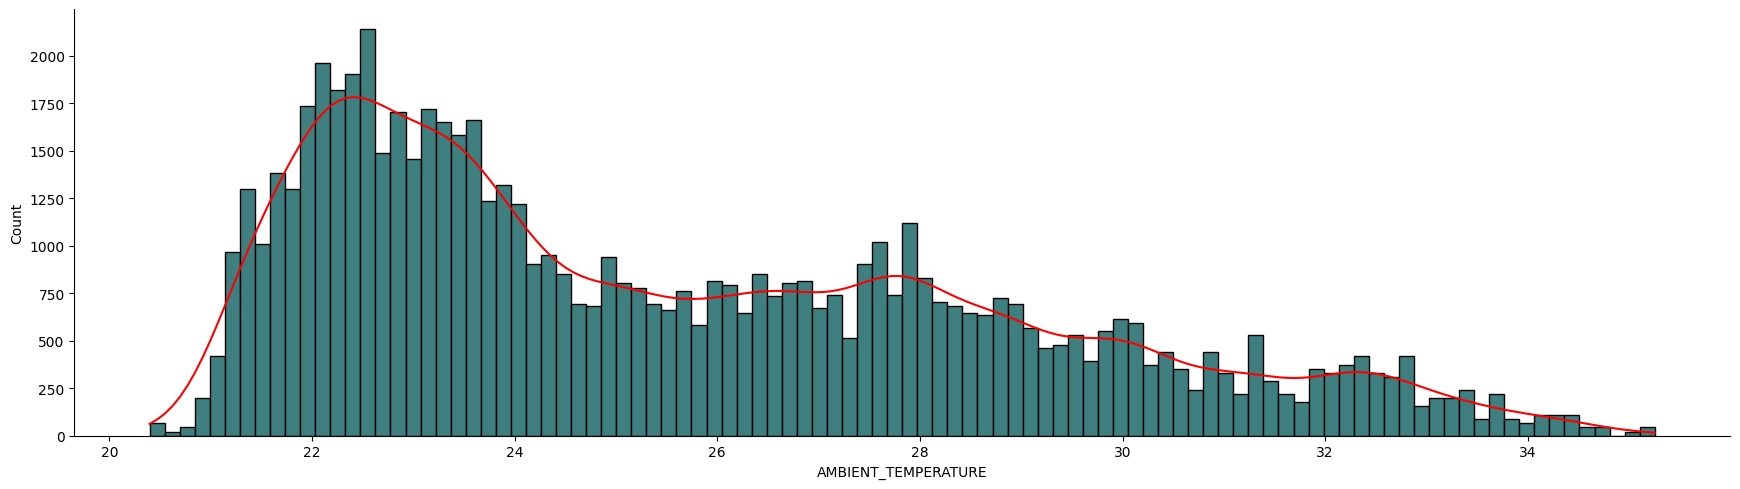

In [267]:
sns.displot(data=df_solar, x="AMBIENT_TEMPERATURE", kde=True, bins = 100,color = "red", facecolor = "#3F7F7F",height = 5, aspect = 3.5);

In [268]:
df_solar['DATE'].nunique()

34

# Multiple Plotting of DC_POWER generation on per day basis.

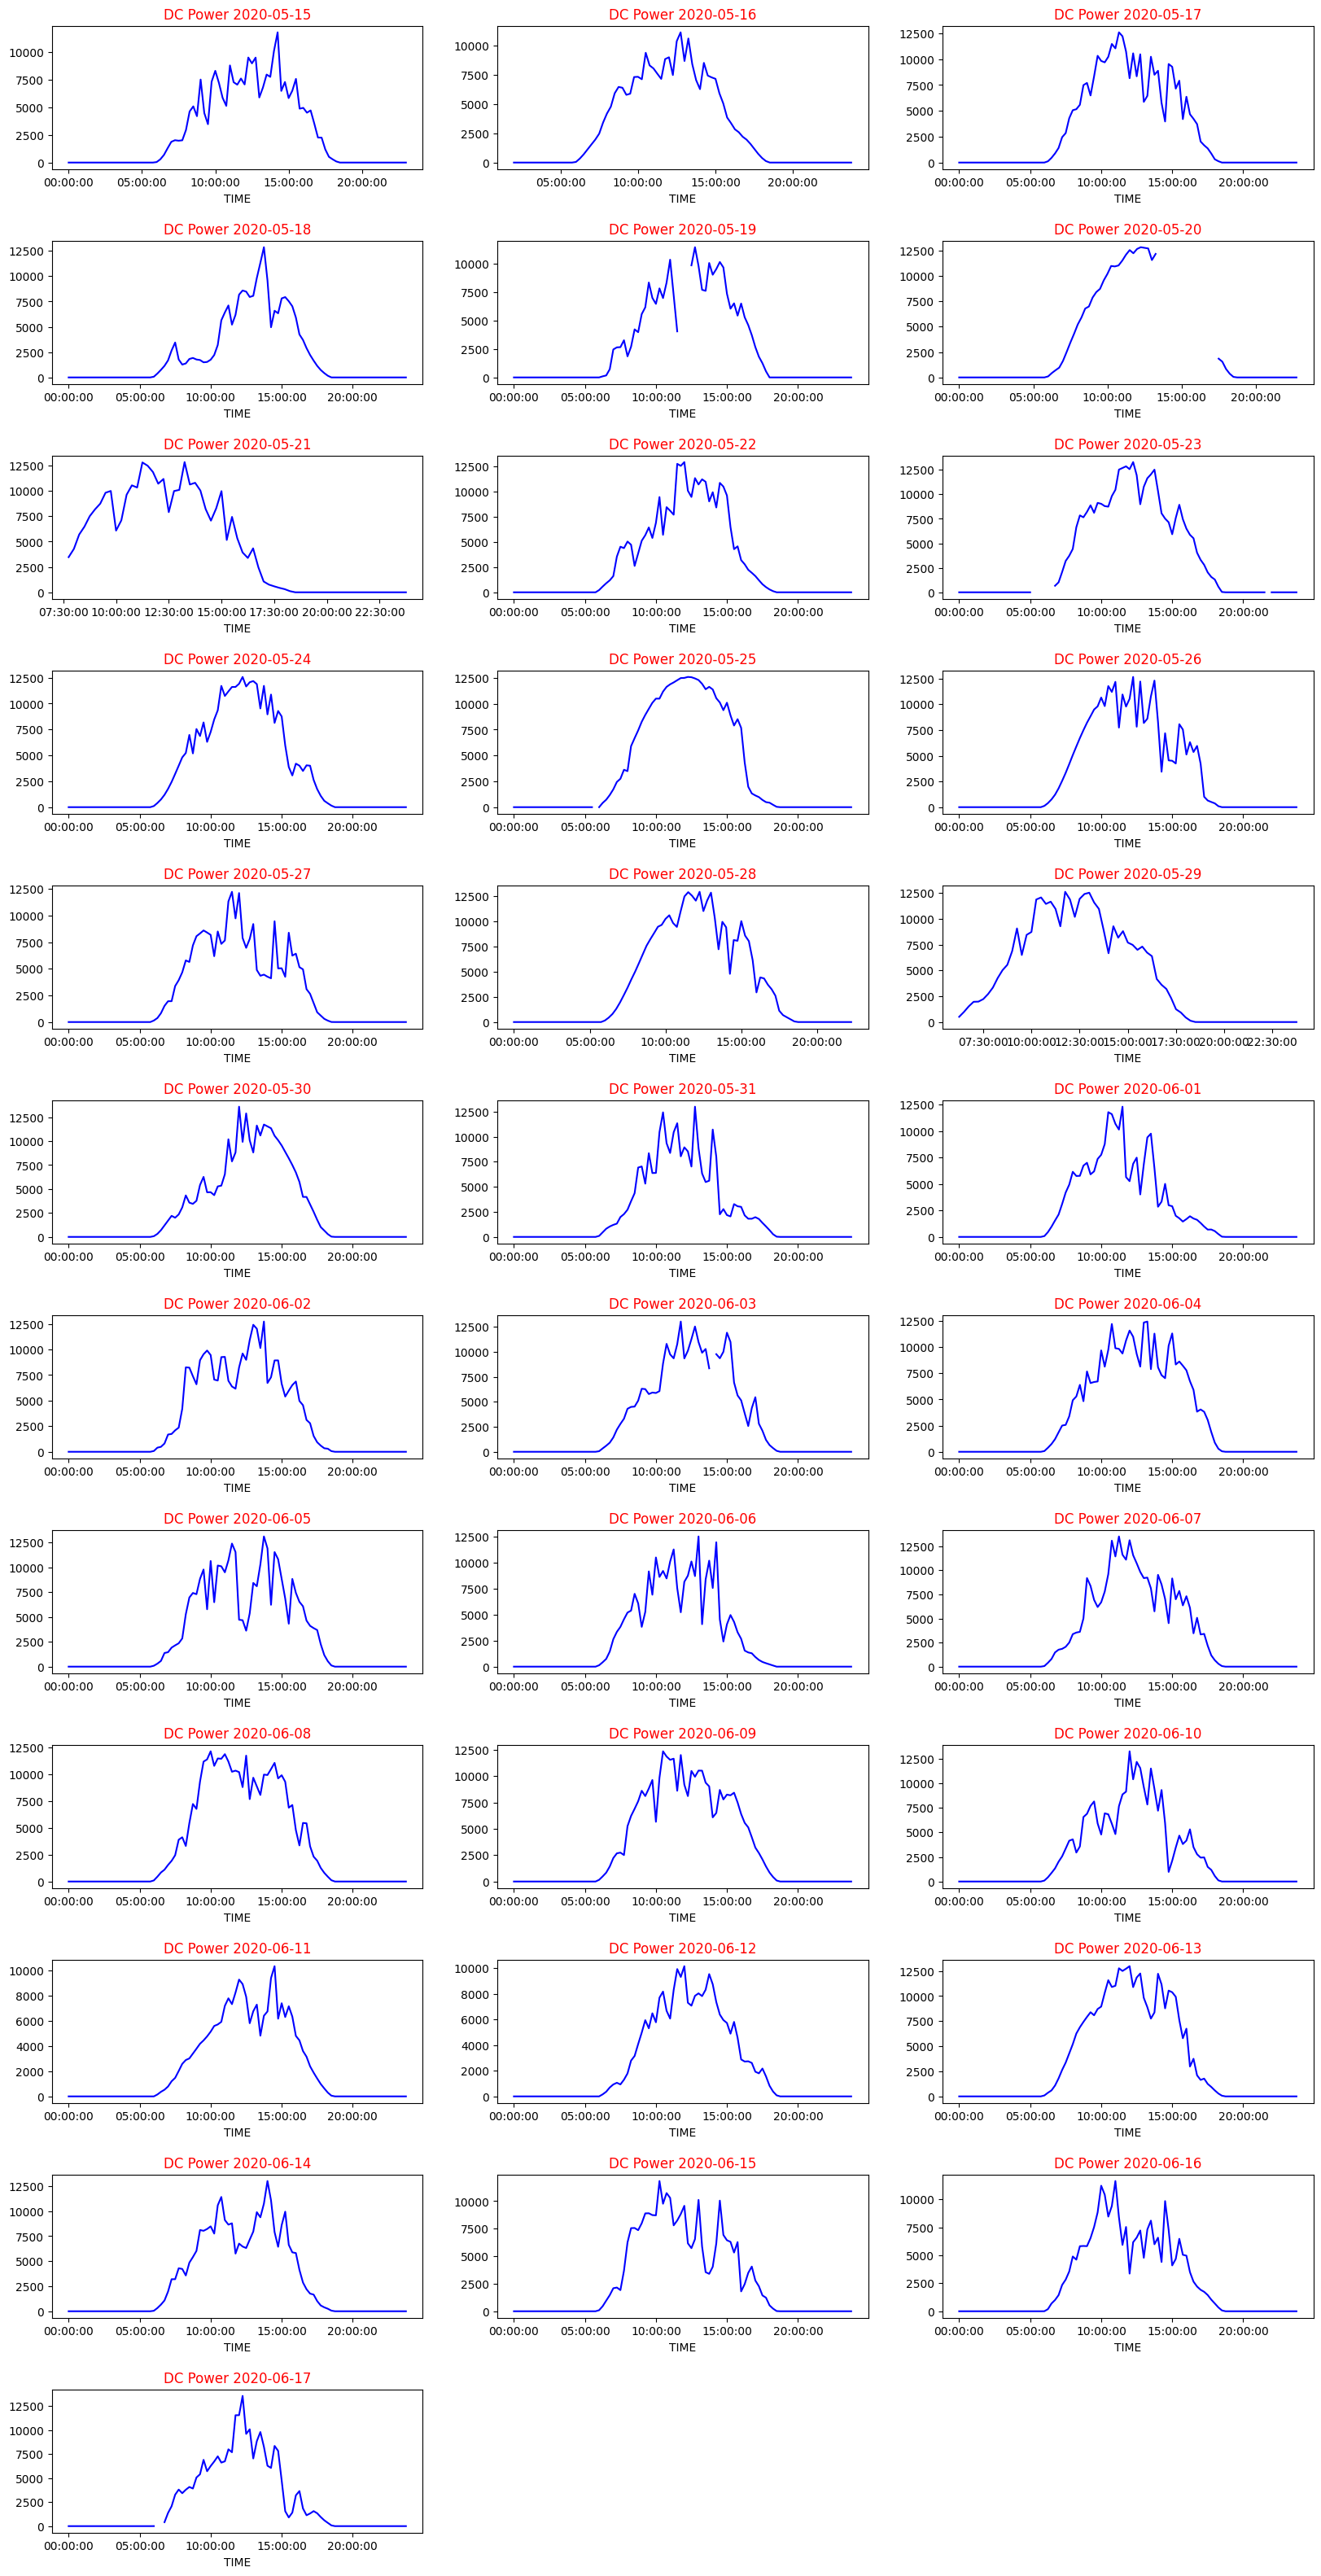

In [269]:
solar_dc = df_solar.pivot_table(values='DC_POWER', index='TIME', columns='DATE')

def Daywise_plot(data= None, row = None, col = None, title='DC Power'):
    cols = data.columns # take all column
    gp = plt.figure(figsize=(20,40))

    gp.subplots_adjust(wspace=0.2, hspace=0.5)
    for i in range(1, len(cols)+1):
        ax = gp.add_subplot(row,col, i)
        data[cols[i-1]].plot(ax=ax, color='blue')
        ax.set_title('{} {}'.format(title, cols[i-1]),color='red')

Daywise_plot(data=solar_dc, row=12, col=3)


#
above per day DC_POWER generation graph shows that there is a some fluctuation in the Solar power generation.

Less Fluctuation in DC_POWER generation is observed in the below mentioned days.

        2020-05-15
        2020-05-18
        2020-05-22
        2020-05-23
        2020-05-24
        2020-05-25
        2020-05-26

High Fluctuation in DC_POWER generation is observed in the below mentioned days.

        2020-05-19
        2020-05-28
        2020-05-29
        2020-06-02
        2020-06-03
        2020-06-04
        2020-06-13
        2020-06-14
        2020-06-17

Very High Fluctuation & Reduction in DC_POWER generation is observed in in the below mentioned days.

        2020-06-03
        2020-06-11
        2020-06-12
        2020-06-15

Note: Reason for very high Fluctuation & Reduction in DC_POWER generation is due to fault in the system or may be fluctuation in weather or due to clouds etc. which need to be analyse further


# Multiple Plotting of IRRADIATION generation on per day basis.

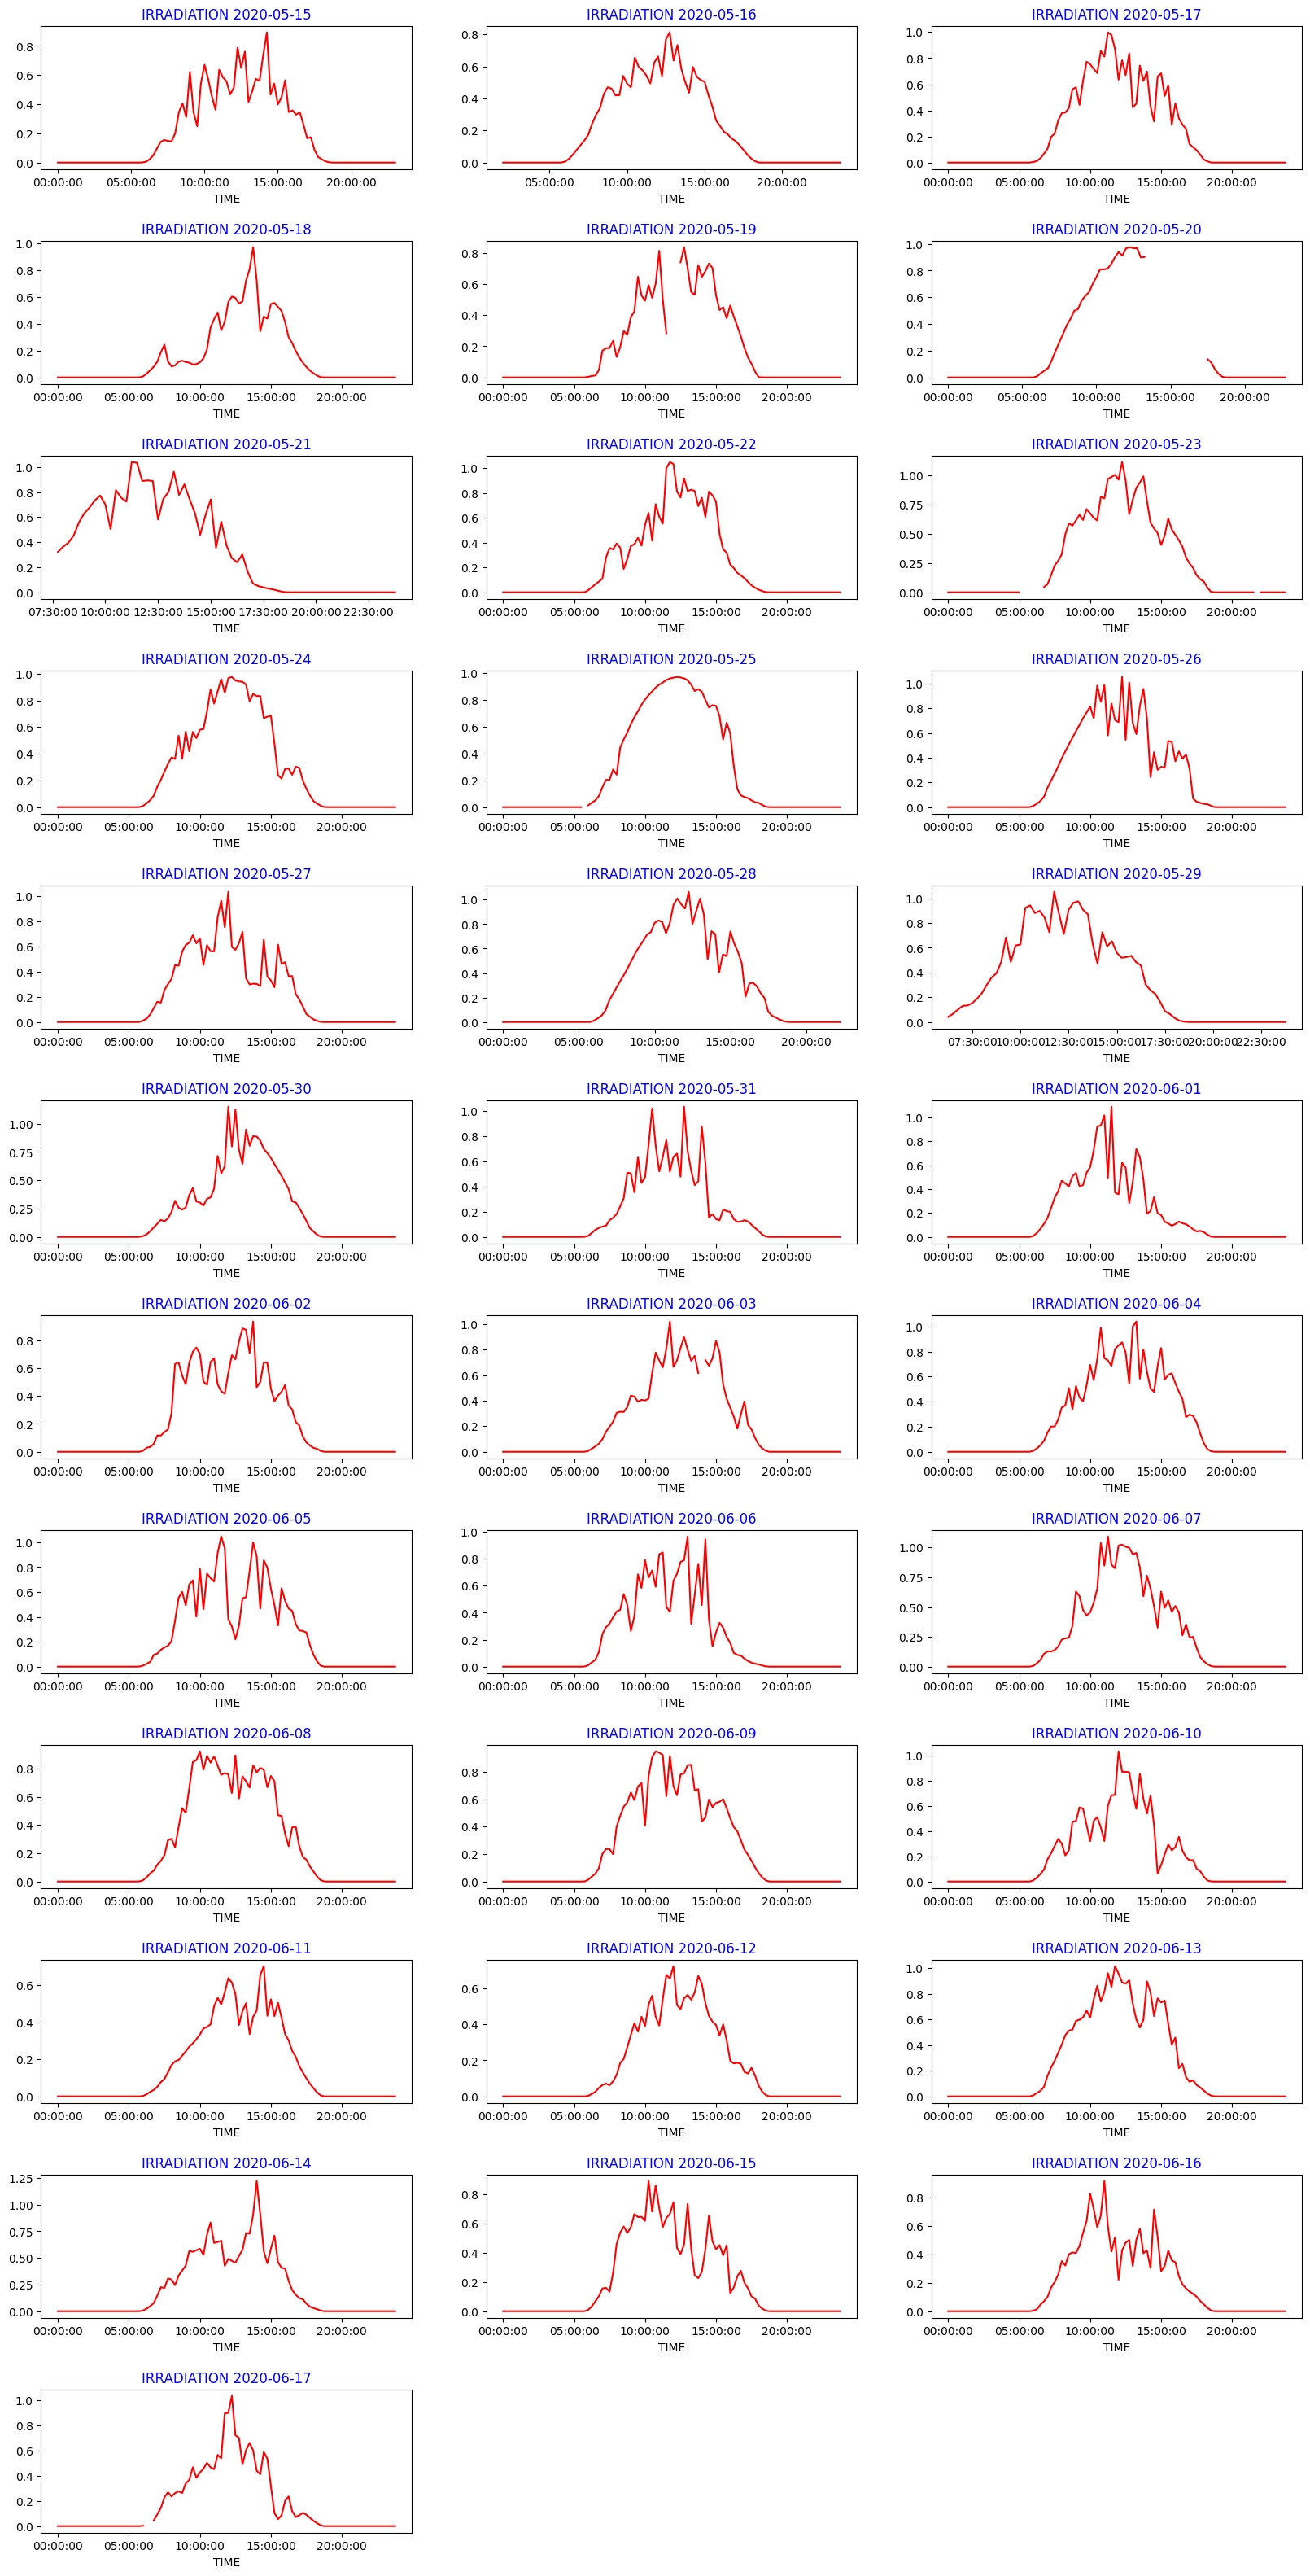

In [270]:
solar_irradiation = df_solar.pivot_table(values='IRRADIATION', index='TIME', columns='DATE')

def Daywise_plot(data= None, row = None, col = None, title='IRRADIATION'):
    cols = data.columns # take all column
    gp = plt.figure(figsize=(20,40))

    gp.subplots_adjust(wspace=0.2, hspace=0.5)
    for i in range(1, len(cols)+1):
        ax = gp.add_subplot(row,col, i)
        data[cols[i-1]].plot(ax=ax, color='red')
        ax.set_title('{} {}'.format(title, cols[i-1]),color='blue')

Daywise_plot(data=solar_irradiation, row=12, col=3)

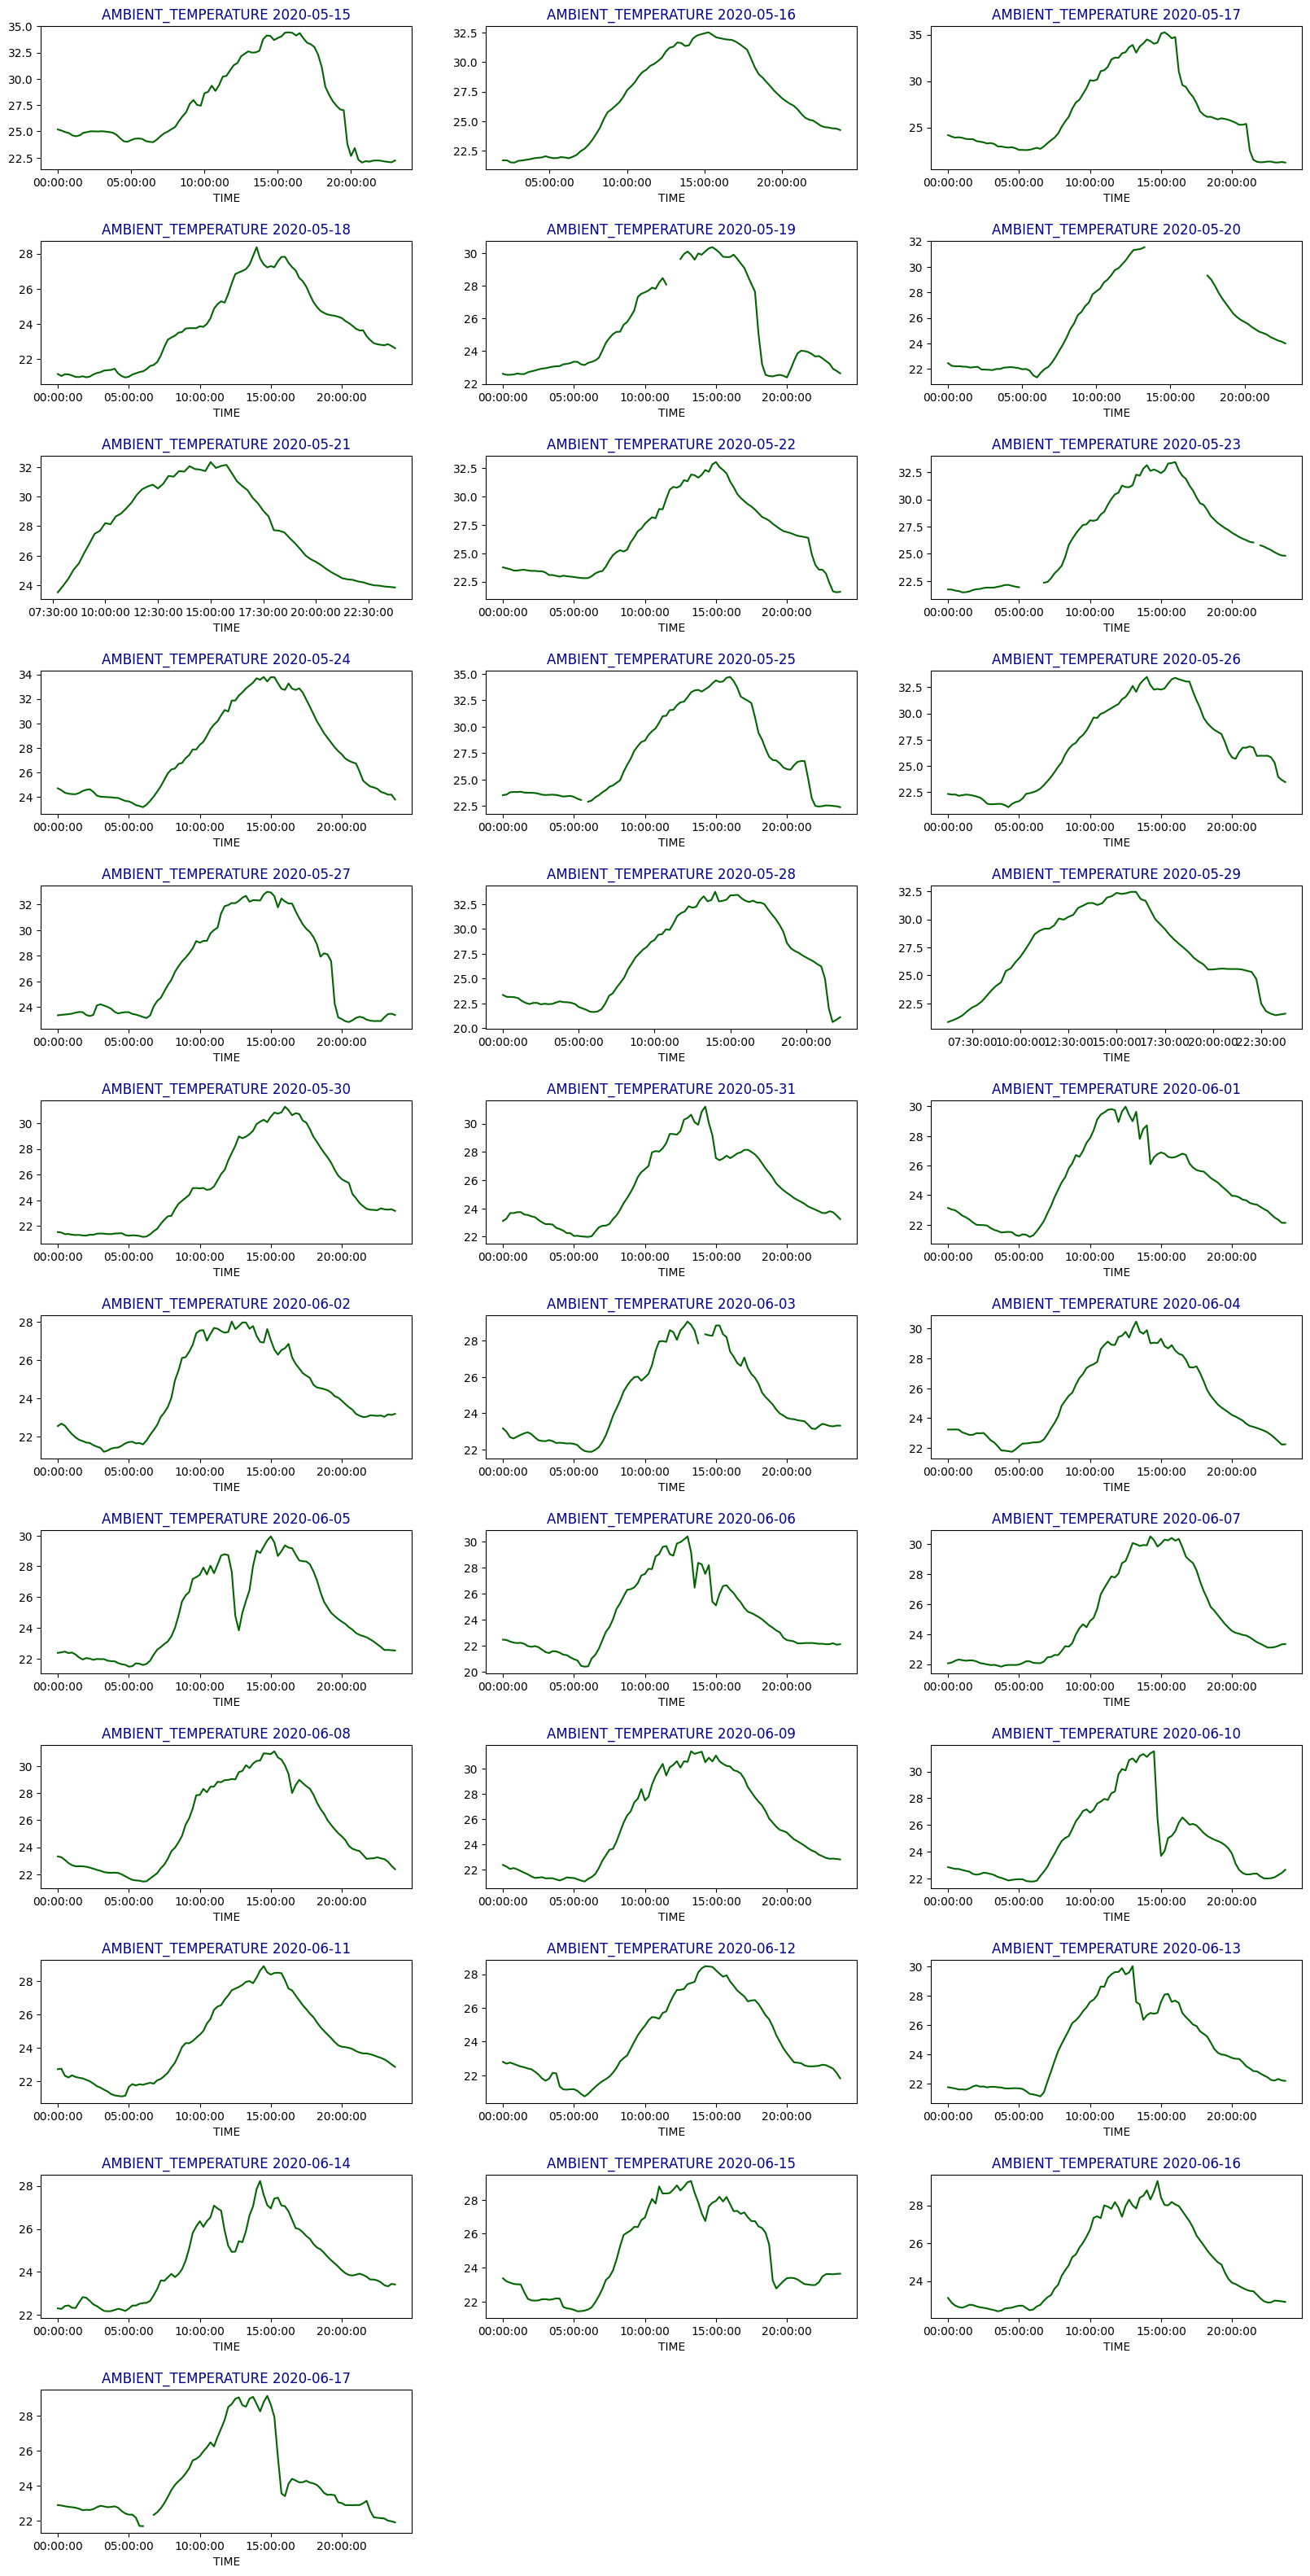

In [271]:
solar_ambiant_temp = df_solar.pivot_table(values='AMBIENT_TEMPERATURE', index='TIME', columns='DATE')

def Daywise_plot(data= None, row = None, col = None, title='AMBIENT_TEMPERATURE'):
    cols = data.columns # take all column
    gp = plt.figure(figsize=(20,40))

    gp.subplots_adjust(wspace=0.2, hspace=0.5)
    for i in range(1, len(cols)+1):
        ax = gp.add_subplot(row,col, i)
        data[cols[i-1]].plot(ax=ax, color='darkgreen')
        ax.set_title('{} {}'.format(title, cols[i-1]),color='darkblue')

Daywise_plot(data=solar_ambiant_temp, row=12, col=3)

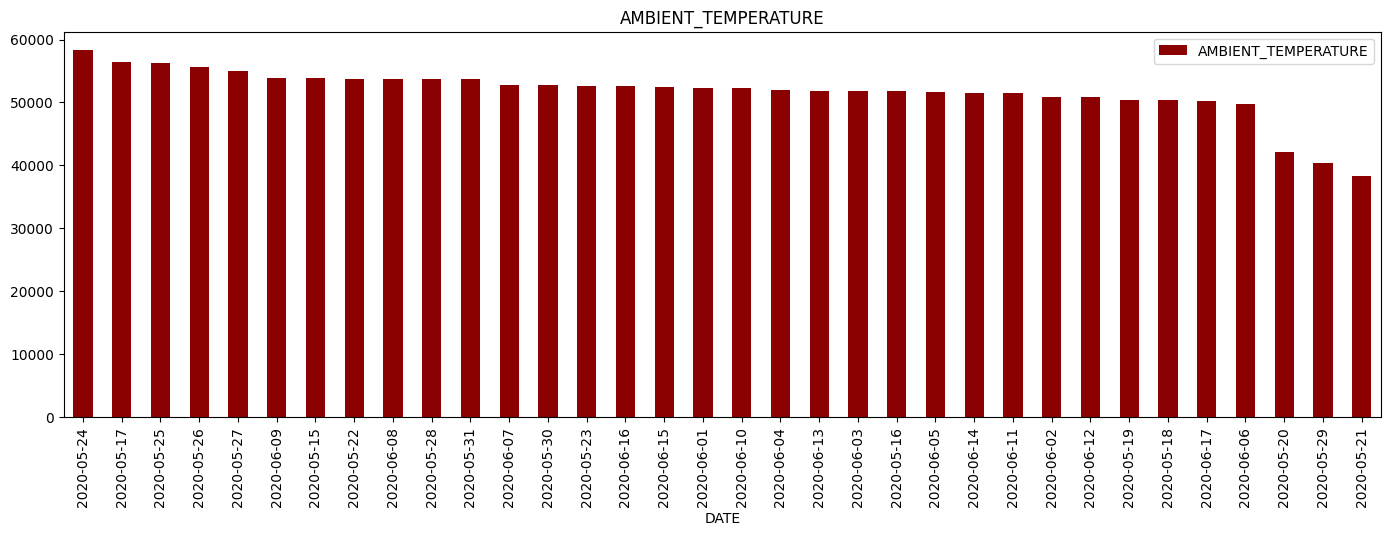

In [272]:
daily_ambient_temp = df_solar.groupby('DATE')['AMBIENT_TEMPERATURE'].agg('sum')

daily_ambient_temp.sort_values(ascending=False).plot.bar(figsize=(17,5), legend=True,color='darkred')
plt.title('AMBIENT_TEMPERATURE')
plt.show()

# Comparision between Best and Worst Power generation

Highest average DC_POWER is generated on "2020-05-25"

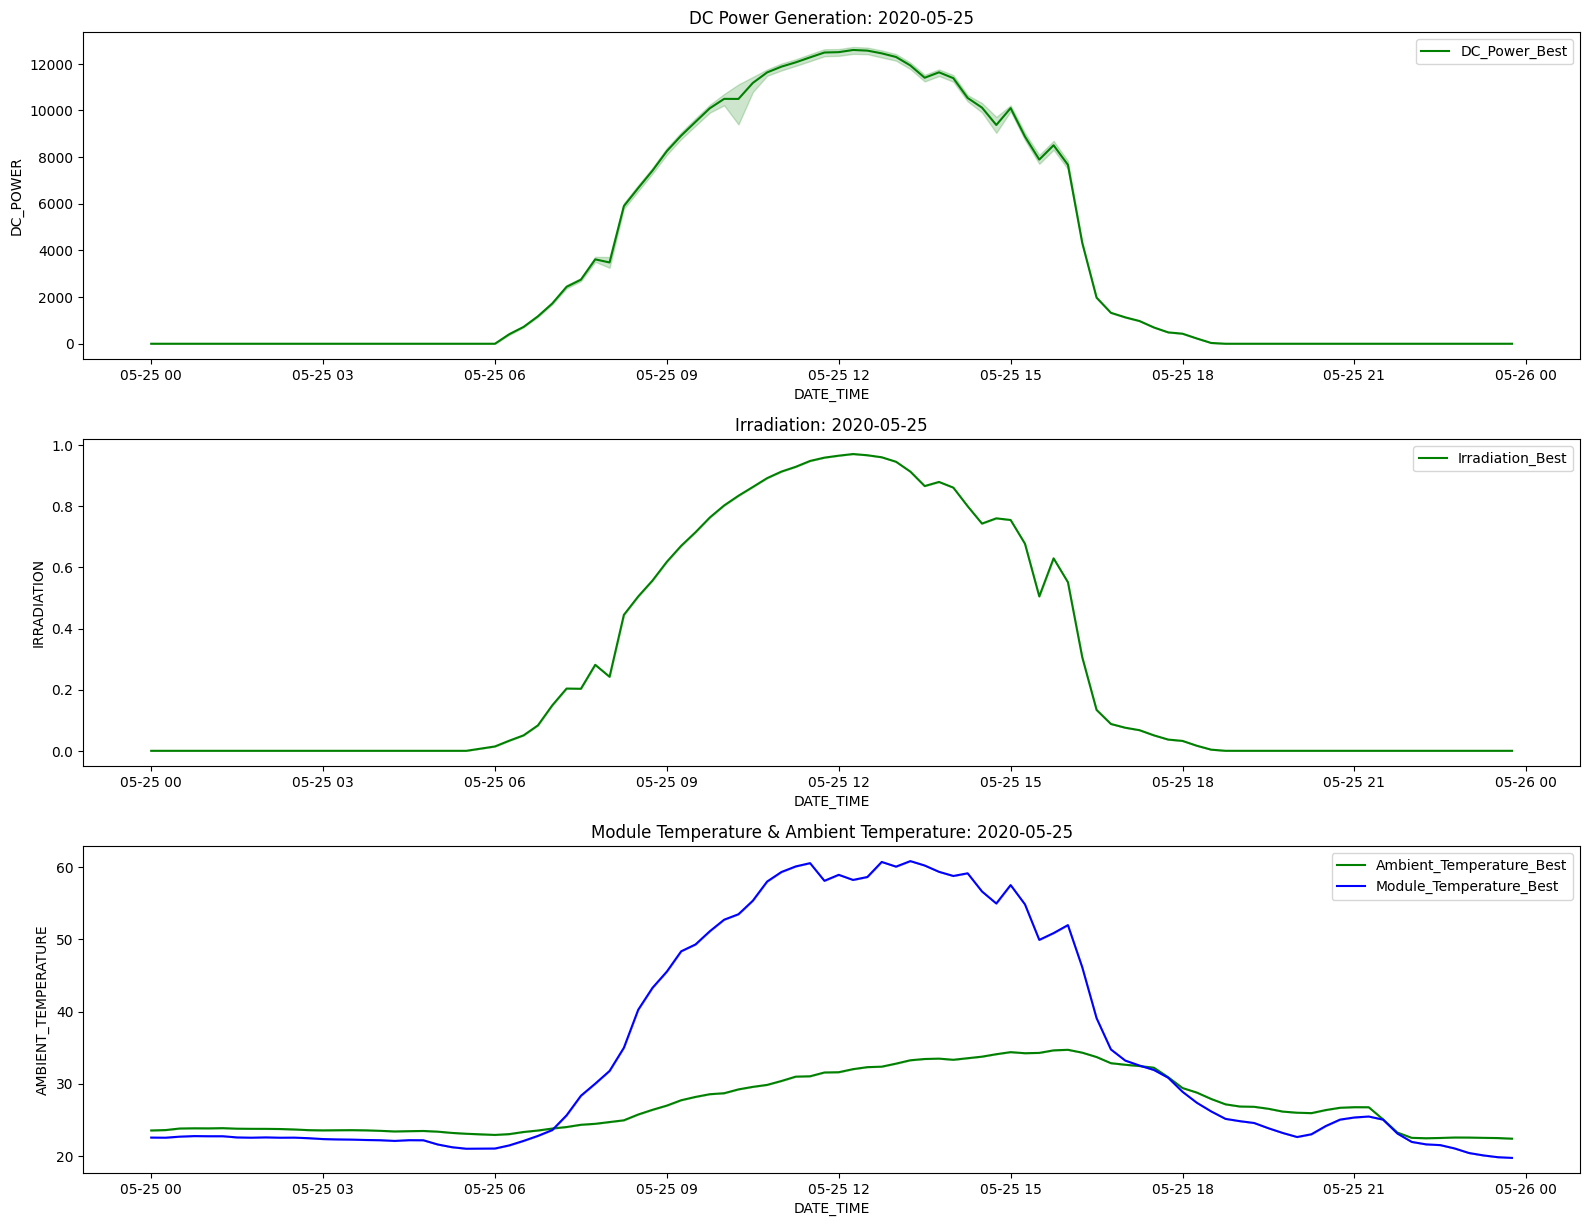

In [273]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the figure size
plt.figure(figsize=(16,16))

# Filter for the specific date
date = ["2020-05-25"]

# Plot 1: DC Power Generation
plt.subplot(411)
sns.lineplot(
    x=df_solar[df_solar["DATE_STRING"].isin(date)].DATE_TIME,
    y=df_solar[df_solar["DATE_STRING"].isin(date)].DC_POWER,
    label="DC_Power_Best",
    color='green'
)
plt.title("DC Power Generation: {}".format(date[0]))

# Plot 2: Irradiation
plt.subplot(412)
sns.lineplot(
    x=df_solar[df_solar["DATE_STRING"].isin(date)].DATE_TIME,
    y=df_solar[df_solar["DATE_STRING"].isin(date)].IRRADIATION,
    label="Irradiation_Best",
    color='green'
)
plt.title("Irradiation: {}".format(date[0]))

# Plot 3: Ambient and Module Temperature
plt.subplot(413)
sns.lineplot(
    x=df_solar[df_solar["DATE_STRING"].isin(date)].DATE_TIME,
    y=df_solar[df_solar["DATE_STRING"].isin(date)].AMBIENT_TEMPERATURE,
    label="Ambient_Temperature_Best",
    color='green'
)
sns.lineplot(
    x=df_solar[df_solar["DATE_STRING"].isin(date)].DATE_TIME,
    y=df_solar[df_solar["DATE_STRING"].isin(date)].MODULE_TEMPERATURE,
    label="Module_Temperature_Best",
    color='blue'
)
plt.title("Module Temperature & Ambient Temperature: {}".format(date[0]))

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()


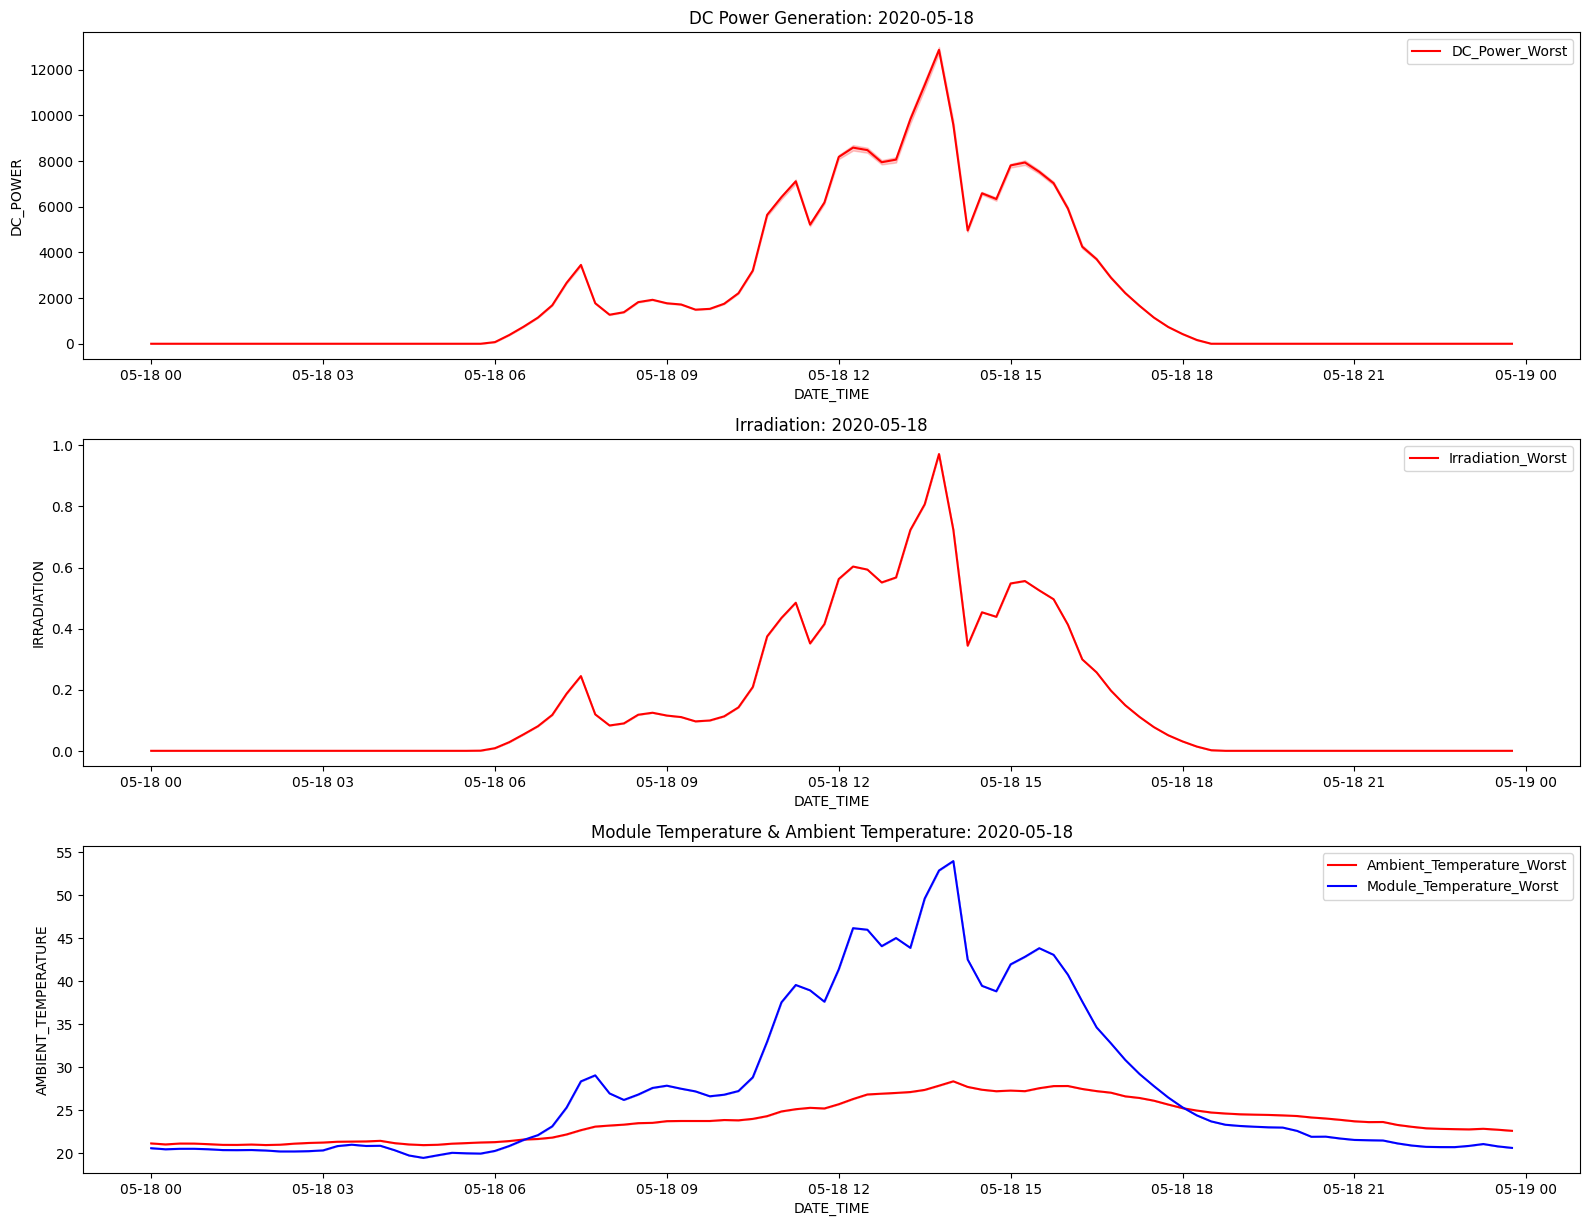

In [274]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the date for filtering the data
date = ["2020-05-18"]

# Create a figure with a defined size
plt.figure(figsize=(16,16))

# Plot 1: DC Power Generation
plt.subplot(411)
sns.lineplot(
    x=df_solar[df_solar["DATE_STRING"].isin(date)].DATE_TIME,
    y=df_solar[df_solar["DATE_STRING"].isin(date)].DC_POWER,
    label="DC_Power_Worst",
    color='red'
)
plt.title("DC Power Generation: {}".format(date[0]))

# Plot 2: Irradiation
plt.subplot(412)
sns.lineplot(
    x=df_solar[df_solar["DATE_STRING"].isin(date)].DATE_TIME,
    y=df_solar[df_solar["DATE_STRING"].isin(date)].IRRADIATION,
    label="Irradiation_Worst",
    color='red'
)
plt.title("Irradiation: {}".format(date[0]))

# Plot 3: Ambient and Module Temperature
plt.subplot(413)
sns.lineplot(
    x=df_solar[df_solar["DATE_STRING"].isin(date)].DATE_TIME,
    y=df_solar[df_solar["DATE_STRING"].isin(date)].AMBIENT_TEMPERATURE,
    label="Ambient_Temperature_Worst",
    color='red'
)
sns.lineplot(
    x=df_solar[df_solar["DATE_STRING"].isin(date)].DATE_TIME,
    y=df_solar[df_solar["DATE_STRING"].isin(date)].MODULE_TEMPERATURE,
    label="Module_Temperature_Worst",
    color='blue'
)
plt.title("Module Temperature & Ambient Temperature: {}".format(date[0]))

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plots
plt.show()


In [275]:
#Here we take all nonzero DC values and plot them on histogram
DC_list=[]
for i in df_solar['DC_POWER']:
    if i>0:
        DC_list.append(i)
DC_list
DC_list.sort()
DC_list.reverse()
len(DC_list)

36823

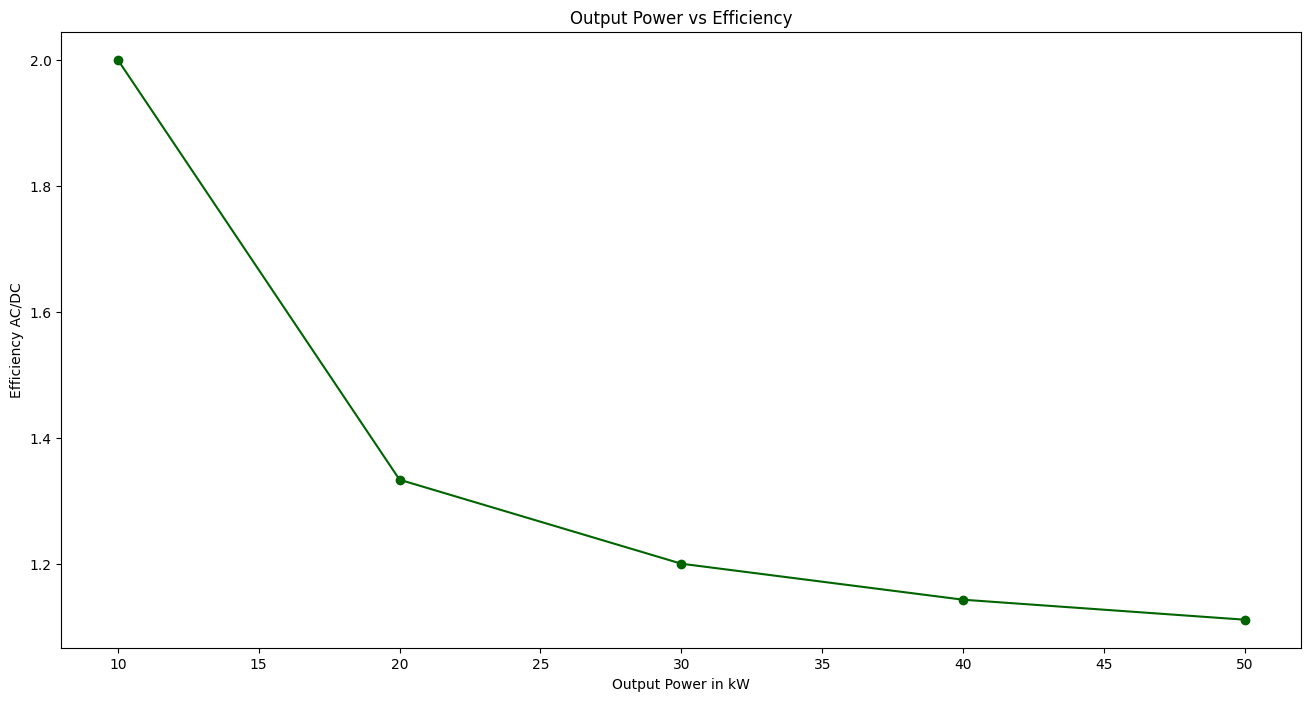

In [276]:
import matplotlib.pyplot as plt

# Ensure AC_list and DC_list are defined and contain data
# Example initialization (replace with your actual data extraction)
AC_list = [10, 20, 30, 40, 50]  # Replace with your actual data
DC_list = [5, 15, 25, 35, 45]   # Replace with your actual data

# Sort the lists
AC_list.sort()
DC_list.sort()

# Calculate efficiency, avoid division by zero
eff = [i/j for i, j in zip(AC_list, DC_list) if j != 0]

# Plot the efficiency
plt.figure(figsize=(16,8))
plt.plot(AC_list, eff, color='darkgreen', marker='o')
plt.xlabel('Output Power in kW')
plt.ylabel('Efficiency AC/DC')
plt.title('Output Power vs Efficiency')

# Show the plot
plt.show()


# Solar Power Prediction using different ML techniques

In [277]:
df2 = df_solar.copy()
X = df2[['DAILY_YIELD','TOTAL_YIELD','AMBIENT_TEMPERATURE','MODULE_TEMPERATURE','IRRADIATION','DC_POWER']]
y = df2['AC_POWER']

# if required you can check the values in X and y by passing the command X.head() and y.head()

In [278]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state=21)

## 1. LinearRegression

In [279]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
score_lr = 100*lr_clf.score(X_test,y_test)
print(f'LR Model score = {score_lr:4.4f}%')

LR Model score = 99.9995%


# 2. Random Forest Regressor

In [280]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score


rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)


y_pred_rfr = rfr.predict(X_test)
R2_Score_rfr = round(r2_score(y_test, y_pred_rfr) * 100, 2)

print("R2 Score : ", R2_Score_rfr, "%")


R2 Score :  100.0 %


# 3. Decision Tree Regressor

In [281]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

# Initialize and fit the DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)

# Predict using the trained DecisionTreeRegressor
y_pred_dtr = dtr.predict(X_test)

# Calculate R^2 score
R2_Score_dtr = round(r2_score(y_test, y_pred_dtr) * 100, 2)

print("R2 Score : ", R2_Score_dtr, "%")


R2 Score :  100.0 %


# 12. Result Prediction

In [282]:
forecast_prediction = rfr.predict(X_test)
print(forecast_prediction)

[   0.         1071.29826793  299.64664285 ...  669.41516071  377.81417857
  117.47580358]


In [283]:
cross_check = pd.DataFrame({'Actual' : y_test , 'Predicted' : forecast_prediction})
cross_check.head()

,Actual,Predicted
43819,0.0000,0.000000
2949,1072.3250,1071.298268
33769,299.8125,299.646643
47825,0.0000,0.000000
29370,0.0000,0.000000


In [284]:
cross_check['Error'] = cross_check['Actual'] - cross_check['Predicted']
cross_check.head()

,Actual,Predicted,Error
43819,0.0000,0.000000,0.000000
2949,1072.3250,1071.298268,1.026732
33769,299.8125,299.646643,0.165857
47825,0.0000,0.000000,0.000000
29370,0.0000,0.000000,0.000000
